## 3.3. Decision Trees

---

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

dataTrain: pd.DataFrame = pd.read_csv('data/prepared_s/data.csv', sep=';')
dataTest: pd.DataFrame = pd.read_csv('data/prepared_test/data.csv', sep=';')
    
dataTest_copy = dataTest.copy(deep=True)

for feature in dataTest_copy.columns:
    if feature not in dataTrain.columns:
        dataTest = dataTest.drop(feature, axis=1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import ds_functions as ds

trnY: np.ndarray = dataTrain.pop('exp').values
trnX: np.ndarray = dataTrain.values
tstY: np.ndarray = dataTest.pop('exp').values
tstX: np.ndarray = dataTest.values
    
labels = pd.unique(trnY)

<Figure size 600x450 with 0 Axes>

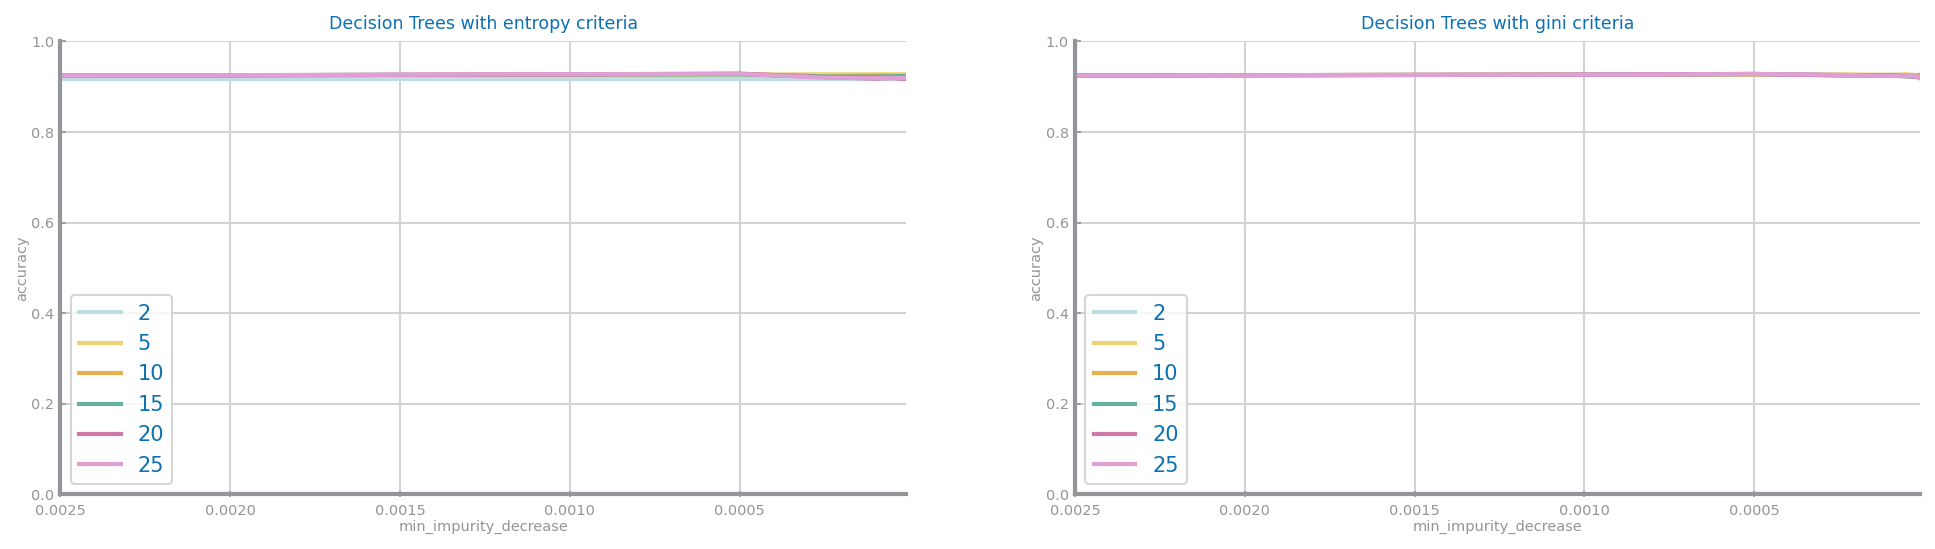

Best results achieved with entropy criteria, depth=20 and min_impurity_decrease=0.000500 ==> accuracy=0.928836


In [3]:
from sklearn.tree import DecisionTreeClassifier

# TODO: escala nao deixa ver bem as linhas todas correct it?

min_impurity_decrease = [0.0025, 0.001, 0.0005, 0.00025, 0.0001, 0.00005, 0.000025, 0.00001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%f ==> accuracy=%f'%(best[0], best[1], best[2], last_best))

In [4]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

<Figure size 2100x2700 with 0 Axes>

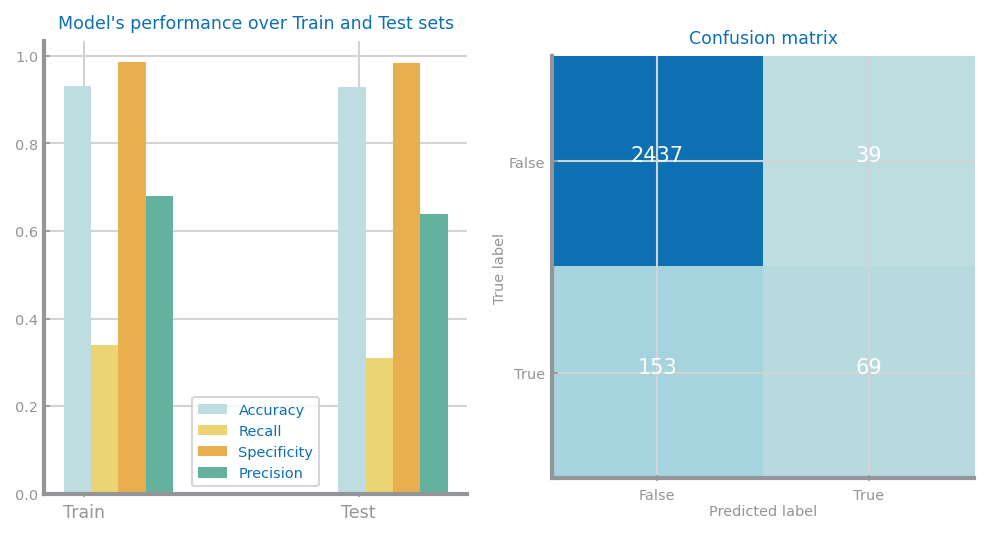

In [5]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst, showXTickLabels = True)

### Overfitting

<Figure size 600x450 with 0 Axes>

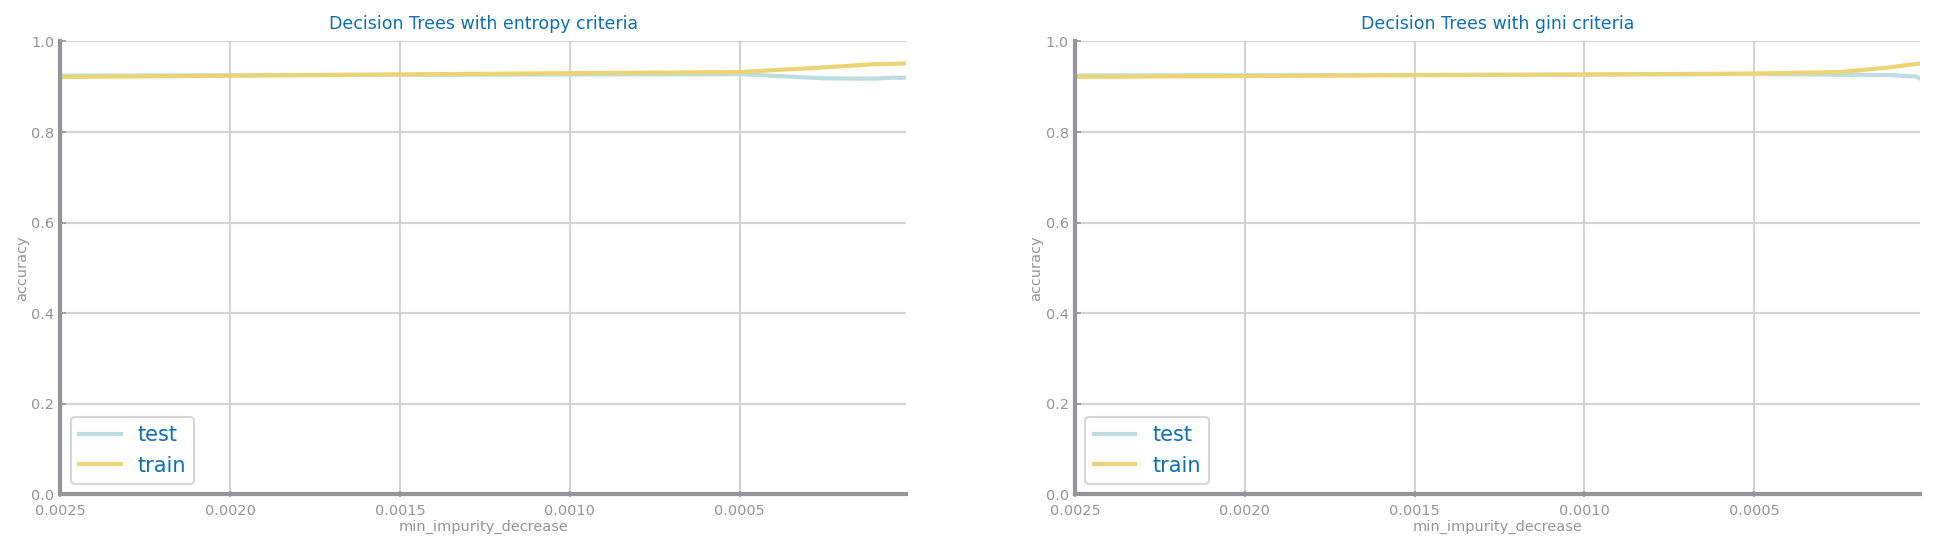

Best results achieved with entropy criteria, depth=20 and min_impurity_decrease=0.000500 ==> accuracy=0.928836


In [6]:
max_depths = [best[1]]

plt.figure()
fig, axs = plt.subplots(1, len(criteria), figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        yvalues_train = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            prdY_train = tree.predict(trnX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            yvalues_train.append(metrics.accuracy_score(trnY, prdY_train))
        values['test'] = yvalues
        values['train'] = yvalues_train
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%f ==> accuracy=%f'%(best[0], best[1], best[2], last_best))

### Summary

---

***How do models improve with the increase of max_depth?***


***How does performance changes with decrease of min_impurity_decrease?***


***How do different criteria impact the model performance?***


***What is the best parametrisation (criteria, max_depth and min_impurity_decrease)?***


***Is the accuracy achieved good enough?***


***What is the largest kind of errors?***


***Is it possible to identify overfitting?***
